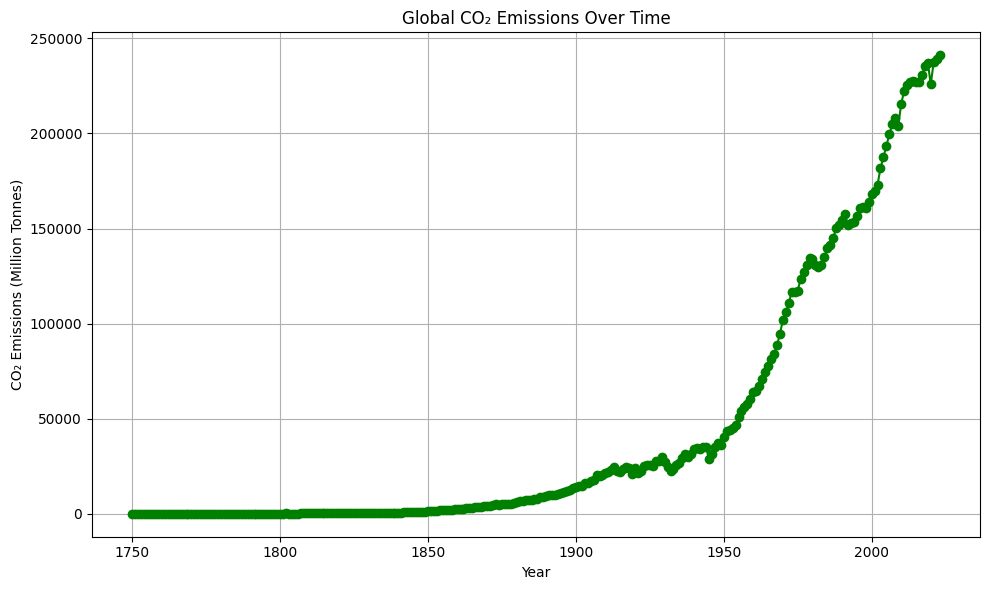

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Reload the dataset
file_path = '/Users/d.rokkam2/DS4200/owid-co2-data.csv'
df = pd.read_csv(file_path)

# Visualization 1
df_viz1 = df[df['co2'].notna()]
global_emissions = df_viz1.groupby('year')['co2'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(global_emissions['year'], global_emissions['co2'], marker='o', color='green')
plt.title('Global CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Million Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart shows a dramatic rise in global CO₂ emissions since the Industrial Revolution, with the sharpest increases occurring post-1950. The use of a line with markers emphasizes the steady trend and year-over-year changes, helping viewers track how emissions have grown exponentially over time.

In [35]:
# Visualization 2
valid_data = df[['year', 'country', 'gdp', 'population', 'co2_per_capita']].dropna()
latest_year = valid_data['year'].max()

df_latest = df[df['year'] == latest_year].dropna(subset=['gdp', 'population', 'co2_per_capita'])

fig2 = px.scatter(
    df_latest,
    x='gdp',
    y='co2_per_capita',
    color='continent' if 'continent' in df_latest.columns else 'country',
    size='population',
    hover_name='country',
    title=f'CO₂ per Capita vs GDP per Capita ({latest_year})',
    labels={
        'gdp': 'GDP per Capita (USD)',
        'co2_per_capita': 'CO₂ per Capita (Tonnes)'
    }
)

fig2.update_xaxes(type='log')

fig2.show()


This scatterplot highlights how wealthier countries tend to have higher per capita CO₂ emissions, though there is significant variation. The use of bubble size and color for each country helps quickly differentiate outliers and cluster patterns, revealing disparities between economic output and environmental impact.

In [36]:
# Visualization 3
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
df_country_view = df[df['country'].isin(selected_countries) & df['co2'].notna()]

fig3 = px.line(
    df_country_view,
    x='year',
    y='co2',
    color='country',
    title='CO₂ Emissions Over Time (Selected Countries)',
    labels={'year': 'Year', 'co2': 'CO₂ Emissions (Million Tonnes)'}
)
fig3.update_traces(mode='lines+markers')


This multi-line chart compares the historical CO₂ emissions of Brazil, China, Germany, India, and the United States. The design choice to plot them on the same axis allows for a direct comparison of each country’s emissions trajectory, showcasing how China recently overtook the U.S. while India’s emissions have been rising steadily.